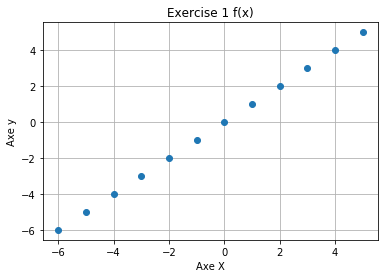

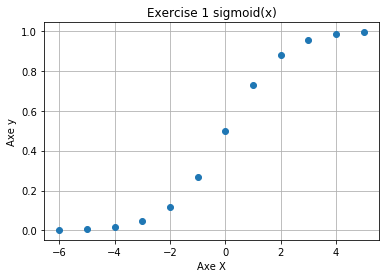

Matrice Y
[['100090' 'smooth']
 ['100458' 'smooth']
 ['100479' 'smooth']
 ['100672' 'smooth']
 ['100724' 'smooth']
 ['100727' 'smooth']
 ['100867' 'smooth']
 ['101092' 'smooth']
 ['101290' 'smooth']
 ['101291' 'smooth']
 ['101623' 'smooth']
 ['101627' 'smooth']
 ['101858' 'smooth']
 ['101943' 'smooth']
 ['102000' 'smooth']
 ['102182' 'smooth']
 ['102260' 'smooth']
 ['102513' 'smooth']
 ['102602' 'smooth']
 ['102804' 'smooth']
 ['102928' 'smooth']
 ['102933' 'smooth']
 ['102977' 'smooth']
 ['103260' 'smooth']
 ['103348' 'smooth']
 ['103354' 'smooth']
 ['103707' 'smooth']
 ['103718' 'smooth']
 ['103819' 'smooth']
 ['103902' 'smooth']
 ['104096' 'smooth']
 ['104143' 'smooth']
 ['104159' 'smooth']
 ['104173' 'smooth']
 ['104196' 'smooth']
 ['104422' 'smooth']
 ['104611' 'smooth']
 ['104612' 'smooth']
 ['104703' 'smooth']
 ['104988' 'smooth']
 ['105020' 'smooth']
 ['105088' 'smooth']
 ['105165' 'smooth']
 ['105447' 'smooth']
 ['105459' 'smooth']
 ['105507' 'smooth']
 ['105755' 'smooth']
 ['

In [ ]:
# installation de scikit-image est necessaire (conda install -c anaconda scikit-image)
from skimage import io, novice
import numpy as np

%matplotlib inline   
import matplotlib.pyplot as plt

#Exercice 1

def f(x):
    return x

def sigmoid(x):
    return 1/(1+np.exp(-x))


x = np.arange(-6,6) #On crée une liste x de -6 à 6 equidistant

ysig = sigmoid(x) 

y= f(x)

plt.plot(x,y,'o')
plt.xlabel('Axe X')
plt.ylabel('Axe y')
plt.title('Exercise 1 f(x)')
plt.grid(True)
plt.show()

plt.plot(x,ysig,'o')
plt.xlabel('Axe X')
plt.ylabel('Axe y')
plt.title('Exercise 1 sigmoid(x)')
plt.grid(True)
plt.show()


#Exercise 2.2

#Lecture de fichier
fid = open('C:\\Users\\turco\\Downloads\\galaxy\\galaxy\\galaxy_label_data_set.csv', 'r') # option r veut dire read
txt = fid.readlines() # Cette ligne permet de lire tout le fichier 
fid.close() # Fermeture de fichier

a=[]  #Smooth list
b=[]  #Spiral list

for element in txt:
    if len(a) > 50 and len(b) > 50:
        break
    else:
        element = element[:-1]
        element = element.split(',')
        if element[1] == 'smooth' and len(a) < 50:
            a.append(element)
        if element[1] == 'spiral' and len(b) < 50:
            b.append(element)
y = a + b
y = np.array(y)
print('Matrice Y')
print(y)

x = []
x_train_plot = []
imgs = []
for element in y:
    img1 = novice.open('C:/Users/turco/Downloads/images/images/'+ element[0] +'.jpg') #Chemin a votre image de galaxie
    imgs.append(img1)

    #Exercise 2.8, Ici, on veut itérer à travers chaque pixel d'une image et vérifier sa valeur. 
    #[0, 0, 0] = noir
    #[255, 255, 255] = blanc
    #Par la suite on les comptes et les rajoutes avec leur nom d'image dans x_train_plot
    
    blackCount = 0
    whiteCount = 0
    for pixel in img1:
        if (pixel.red == 0 and pixel.blue == 0 and pixel.green == 0):
            blackCount = blackCount + 1
        if (pixel.red == 255 and pixel.blue == 255 and pixel.green == 255):
            whiteCount = whiteCount + 1
    
    x.append([element[0], len(img1[0,0].rgb), img1.width, img1.height])
    x_train_plot.append([element[0], blackCount, whiteCount])

print('Matrice X')
print(x)

print('Matrice de couleurs noir/blanc')
print(x_train_plot)


#Exercise 2.3
randoms = []
while len(randoms) < 20:
    randomNum = np.random.randint(1,len(a)-1)
    randomNum2 = np.random.randint(1,len(b)-1)
    
    randoms.append(a[randomNum])
    randoms.append(b[randomNum2])
    
    del a[randomNum]
    del b[randomNum2]
    
print('Les images aléatoires')
print(randoms)
print(len(randoms))

for element in randoms:
    img1 = novice.open('C:/Users/turco/Downloads/images/images/'+ element[0] +'.jpg') #Chemin a votre image de galaxie
    img1.show()
    
#Exercise 2.4 
X_train=[]
X_test=[]
Y_train=[]
Y_test=[]

# 70% = 35    30% = 15%
X_train.append(x[:35])
X_test.append(x[34:50])
X_train.append(x[49:85])
X_test.append(x[-15:])

Y_train.append(y[:35])
Y_test.append(y[34:50])
Y_train.append(y[49:85])
Y_test.append(y[-15:])


#Exercise 2.5
X_train_crop=[]
X_train_binary=[]
smooth=1
spiral=1

for element in y:
    
    img1 = novice.open('C:/Users/turco/Downloads/images/images/'+ element[0] +'.jpg') #Chemin a votre image de galaxie
    
    y=img1.width
    x=img1.height
    startx = y//2-(50//2)
    starty = x//2-(50//2)    
    img2=(img1[starty:starty+50,startx:startx+50])
    X_train_crop.append (img2)

#Exercise 2.6    
    if element[1]=="smooth" and smooth==1:
        print('smooth cropped')
        img2.show()
        smooth=0   
        
    
    if element[1]=="spiral" and spiral==1:
        print('spiral cropped')
        img2.show()
        spiral=0

#Exercise 2.7       
    img3 =np.dot(img2.rgb[...,:3], [0.299, 0.587, 0.114])
    X_train_binary.append(img3)
    
#Exercise 2.9
x_axis=[]
y_axis=[]

for element in x_train_plot:
    x_axis.append(element[1])
    y_axis.append(element[2])
    
plt.plot(x_axis, y_axis, 'o')
plt.xlabel('# of black pixels')
plt.ylabel('# of white pixels')
plt.title('Images distribution')
plt.grid(True)
plt.show()
    